Import Dataset

In [66]:
import kagglehub
import os
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Download latest version
csv_path = kagglehub.dataset_download("brijlaldhankour/hair-loss-dataset")

csv_path = os.path.join(csv_path, "hair_loss.csv")

print(f"Path to Dataset: {csv_path}")

Path to Dataset: C:\Users\rapco\.cache\kagglehub\datasets\brijlaldhankour\hair-loss-dataset\versions\1\hair_loss.csv


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.is_available()

if torch.cuda.is_available():
    print(torch.cuda.get_device_name()) 

NVIDIA GeForce RTX 3050 Ti Laptop GPU


Exploring Data

In [30]:
data_df = pd.read_csv(csv_path)
data_df.head(2)

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1


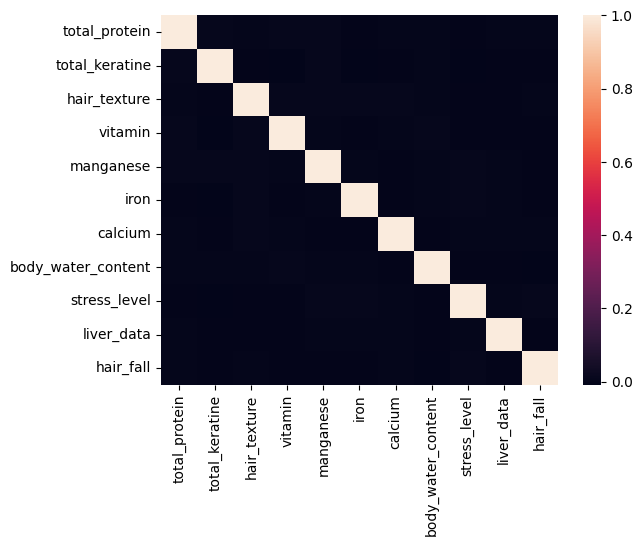

In [31]:
sns.heatmap(data_df.corr())
plt.show()

Data Normalization

In [32]:
X_df, y_df = data_df.drop(columns='hair_fall'), data_df[['hair_fall']]

Split Inputs and Outputs into Test and Training Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state = 42)

In [64]:
# Convert dataset to DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define model parameters
params = {
    "objective": "multi:softmax",
    "eval_metric": "mlogloss",
    "num_class": 6,
    "seed" : 42
}

# Train XGBoost model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100)

In [65]:
preds = xgb_model.predict(test_dmatrix)

In [67]:
# Convert predictions to integer labels
y_pred = preds.astype(int)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.1669
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.16      0.16      3348
           1       0.17      0.17      0.17      3317
           2       0.16      0.18      0.17      3296
           3       0.16      0.15      0.16      3328
           4       0.18      0.15      0.16      3345
           5       0.17      0.18      0.18      3366

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000

